#  IMDB movie review 

## Table of Contents

1. [Introduction](#intro)<br><br>
2. [Reading the Data](#Reading)<br>- 2.1 [Converting the categorical label values to the numericals feature](#Converting)<br><br>
3. [Data Cleaning and Text Preprocessing](#cleaning)<br> - [3.1. Removing HTML Markup by using BeautifulSoup Package](#html)<br> - [3.2. Removing Non-Letter Characters & Converting Reviews to Lower Case](#Removing)<br> - [3.3. Tokenization](#Tokenization)<br> -  [3.4. Removing Stop words](#StopWords)<br> - [3.5. Stemming / Lemmatization](#Stemming)<br> - [3.6. Putting It All Together](#Together)<br><br>

4. [Visualization](#Visualization)<br>- [4.1. WordCloud](#cloud) <br>- [4.2. Distribution](#dist)<br><br>
5. [Bag of Words](#bag)<br><br>
6. [Modeling](#modeling)<br>- [6.1 Multinomial Naive Bayes](#naive)<br><br>
7. [Performing Model on Testing Data](#Testing)<br>

## 1. Introduction <a id='intro'></a>

### Challenge - Movie Rating Prediction
Cody directed a movie which just recently premiered and he got variety of reviews for his movie from the viewers . As there have been many viewers it will be hard for Cody to analyse all the reviews.

So Cody wants you to create him a sentiment analysis model which will take review of the viewer as input and output the sentiment associated with it.

pos-if positive

neg-if negative sentiment is provided by the review.

Cody has already collected reviews of all his previous movies which were already labelled manually. Now your task is to train your model using this data and create a movie review sentiment analysis model.

The data consist of three files as given below.

### File descriptions
#### Train.csv - the training set consists of both review and sentiment pos/neg
#### Test.csv - the test set consists of only reviews your model will be scored on this set
#### Sample_submission.csv -it shows the format of your submissions.it consists of two columns Id and your label . Id is just an index number and label can be pos or neg.

### Data fields
#### movie_review - the review of a movie
#### Sentiment - the sentiment associated with that movie
Before submitting please check the list below:

The column names or headers of submission file must match with that given in sample submission file.

Datatype of the columns of submission file must match with that of the given sample_submission file.

The number of rows must be equal to given test cases and number of columns must be equal to the columns given in the sample submission file.

The goal of our project is to classifiy correctly whether 25,000 movie reviews from IMDB are positive or negative. This is the first part of sentiment analysis which will be used a Bag of Words for creating features. Once we obtain the result of the prediction, we will compare it with the seoncd part of our sentiment analysis.

In [45]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import nltk
import numpy as np

### 2. Reading the Data <a id='Reading'></a>

In [18]:
df = pd.read_csv('Train/Train.csv')
df.head()

review label
0  mature intelligent and highly charged melodram...   pos
1  http://video.google.com/videoplay?docid=211772...   pos
2  Title: Opera (1987) Director: Dario Argento Ca...   pos
3  I think a lot of people just wrote this off as...   pos
4  This is a story of two dogs and a cat looking ...   pos

In [19]:
X = df['review']
y = df['label']

### 2.1 Converting the categorical label values to the numericals feature <a id='Converting'></a>

In [20]:
# 0 for negative and 1 for positive
from sklearn.preprocessing import LabelEncoder
print(y[:5], end= '\n\n')
number = LabelEncoder()
y = number.fit_transform(y)
print(y[:5])

0    pos
1    pos
2    pos
3    pos
4    pos
Name: label, dtype: object

[1 1 1 1 1]


## 3. Data Cleaning <a id = 'cleaning'></a>

#### 3.1. Removing HTML Markup by using BeautifulSoup Package <a id='html'></a>

In [21]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(X[0], "html.parser")

# Without the second argument "html.parser", it will pop out the warning message.
print(example1.get_text())

mature intelligent and highly charged melodrama unbelivebly filmed in China in 1948. wei wei's stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it


#### 3.2. Removing Non-Letter Characters & Converting Reviews to Lower Case <a id='Removing'></a>

It may be important to include some punctuations and numbers such as :-). However for this project, for simplicity, we remove both of them.

In [22]:
import re
letters = re.sub("[^a-zA-Z]", " ", example1.get_text())
letters = letters.lower()
print(letters)

mature intelligent and highly charged melodrama unbelivebly filmed in china in       wei wei s stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it


The meaning of the above regular expression is that except for (^) the letters from a to z and from A to Z ([a-zA-Z]) substitute all the characters to spaces. lower() means conversion any capital letters to lower case.

#### 3.3. Tokenization <a id='Tokenization'></a>
Tokenization is the process splitting a sentence or paragraph into the most basic units.

In [23]:
# Instead of using just split() method, used word_tokenize in nltk library.
word = nltk.word_tokenize(letters)
print(word)

['mature', 'intelligent', 'and', 'highly', 'charged', 'melodrama', 'unbelivebly', 'filmed', 'in', 'china', 'in', 'wei', 'wei', 's', 'stunning', 'performance', 'as', 'the', 'catylast', 'in', 'a', 'love', 'triangle', 'is', 'simply', 'stunning', 'if', 'you', 'have', 'the', 'oppurunity', 'to', 'see', 'this', 'magnificent', 'film', 'take', 'it']


#### 3.4. Removing Stop words <a id='StopWords'></a>
"Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library.


In [24]:
from nltk.corpus import stopwords

print(stopwords.words("english"))
print()
word = [w for w in word if not w in set(stopwords.words("english"))]
print(word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### 3.5. Stemming / Lemmatization  <a id='Stemming'></a>
It is important to know the difference between these two.

- Stemming: Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi

- Lemmatization: Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet".

Usually, either one of them is chosen for text-analysis not both. As a side note, Lancaster is the most aggressive stemmer among three major stemming algorithms (Porter, Snowball, Lancaster) and Porter is the least aggressive. The "aggressive algorithms" means how much a working set of words are reduced. The more aggressive the algorithms, the faster it is; however, in some certain circumstances, it will hugely trim down your working set. Therefore, in this project I decide to use snowball since it is slightly faster than Porter and does not trim down too much information as Lancaster does.

In [25]:
snow = nltk.stem.SnowballStemmer('english')
stems = [snow.stem(w) for w in word]
print(stems)

['matur', 'intellig', 'high', 'charg', 'melodrama', 'unbelivebl', 'film', 'china', 'wei', 'wei', 'stun', 'perform', 'catylast', 'love', 'triangl', 'simpli', 'stun', 'oppurun', 'see', 'magnific', 'film', 'take']


As you can see the word "started", it is converted to "start" and "listening" and "watching" are converted to "listen" and "watch".

#### 3.6. Putting It All Together ¶ <a id='Together'></a>
So far, we have cleaned only one datapoint. Now it's time to apply all the cleaning process to all the data.
To make the code reusable, we need to create a function that can be called many times.

In [26]:
def cleaning(raw_review):
    
    
    # 1. Remove HTML.
    html_text = BeautifulSoup(raw_review,"html.parser").get_text()
    
    # 2. Remove non-letters.
    letters = re.sub("[^a-zA-Z]", " ", html_text)
    
    # 3. Convert to lower case.
    letters = letters.lower()
    
    # 4. Tokenize.
    tokens = nltk.word_tokenize(letters)
    
    # 5. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 6. Remove stop words. 
    words = [w for w in tokens if not w in stops]
    
    # 7. Stemming
    words = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 8. Join the words back into one string separated by space, and return the result.
    return " ".join(words)

In [27]:
X = X.apply(cleaning)

In [28]:
X.head()

0    matur intellig high charg melodrama unbelivebl...
1    http video googl com videoplay docid hl en dis...
2    titl opera director dario argento cast cristin...
3    think lot peopl wrote anoth one tom cruis weir...
4    stori two dog cat look way back home old wise ...
Name: review, dtype: object

### 4. Visualization <a id='Visualization'></a>

#### 4.1 Word Cloud <a id='cloud'></a>

As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [30]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

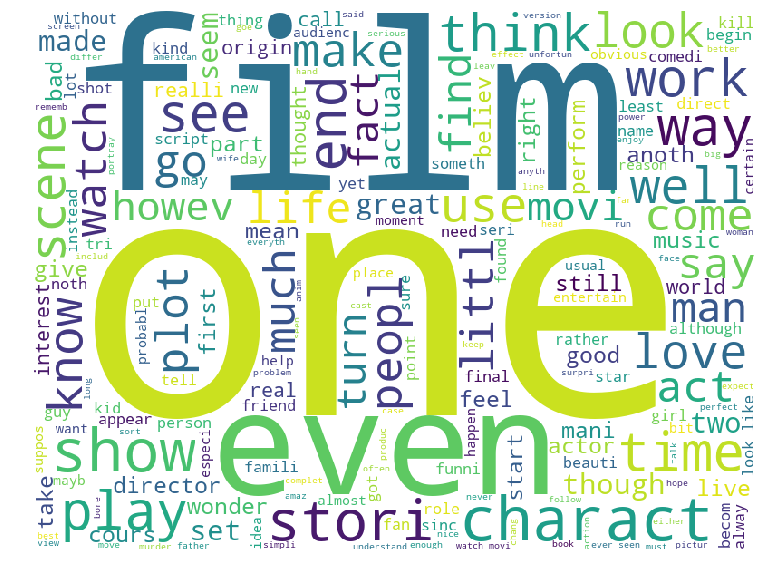

In [31]:
cloud(' '.join(X))

It is not surprising that the most of large words are just the words frequently appeared in the text.

### 4.2 Distribution <a id='dist'></a>

In [32]:
# We need to split each words in cleaned review and then count the number of each rows of data frame.

X['freq_word'] = X.apply(lambda x: len(str(x).split()))
X['unique_freq_word'] = X.apply(lambda x: len(set(str(x).split())))

median of word frequency:  88.0
median of uniuqe word frequency:  73.0


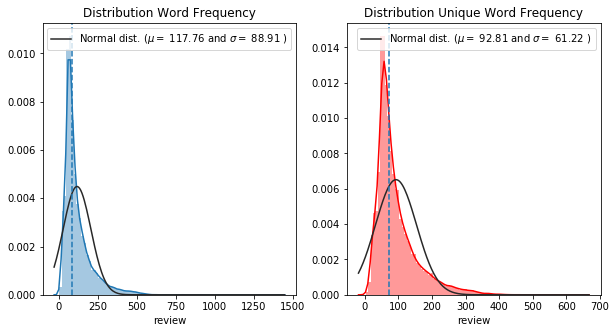

In [33]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(X['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(X['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(X['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", X['freq_word'].median())


sns.distplot(X['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(X['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(X['unique_freq_word'].median(), linestyle='dashed')
print("median of uniuqe word frequency: ", X['unique_freq_word'].median())

The black contour of the distribution graphs represent the normal distribution if the data would have been distributed as normal. Compared to the black contour, the actual distribution is pretty skwed; therefore, median would be better to use as a measure of representative of data since mean is very sensitive to outliers and noise especially the distribution is highly skewed. As shown in the legend, the mean of the word frequency is 117.76 and the mean of the unique word is 92.81. It means 117.76 words and 92.81 unique words are used for each review. Also the dashed lines represent the median of the distribution. Another thing to notice is that the median values are very closely located to the normal distribution's mean points.

In [34]:
#X.drop(columns = ['freq_word', 'unique_freq_word'], inplace = True)
X.drop(['freq_word', 'unique_freq_word'], inplace = True)
X.shape

(40000,)

## 5. Bag of Words <a id='bag'></a>

Even though we cleaned the data with many steps, we still have one more step to create machine learning-friendly input. One common approach is called a Bag of Words. It is simply the matrix that counts how many each word appears in documents (disregard grammar and word order). In order to do that, we use "CountVectorizer" method in sklearn library. As you know already, the number of vocabulary is very large so it is important to limit the size of the feature vectors. In this project, we use the 18000 most frequent words. Also, the other things to notice is that we set min_df = 2 and ngram_range = (1,3). min_df = 2 means in order to include the vocabulary in the matrix, one word must appear in at least two documents. ngram_range means we cut one sentence by number of ngram. Let's say we have one sentence, I am a boy. If we cut the sentence by digram (ngram=2) then the sentence would be cut like this ["I am","am a", "a boy"]. The result of accuracy can be highly dependent on parameters so feel free to alter them and see if you can improve the score.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vectorizer = CountVectorizer(max_features = 18000,
                             min_df = 2,
                             ngram_range = (1,3)
                            )

As mentioned many times, the matrix is going to be huge so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe = Pipeline( [('vect', vectorizer)] )

In [39]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.

train_bw = pipe.fit_transform(X)

In [40]:
print('train dim:', train_bw.shape)

train dim: (40000, 18000)


In [41]:
# Get the name fo the features

lexi = vectorizer.get_feature_names()

In [42]:
lexi[:5]

['aamir', 'aaron', 'abandon', 'abbey', 'abbott']

In [46]:
# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)

train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = lexi)

In [47]:
train_sum.head()

aamir  aaron  abandon  abbey  abbott  abbott costello  abc  abduct  abid  \
0     44    128      455     46      82               52  171     105    40   

   abil  ...  zombi film  zombi flick  zombi movi  zone  zoo  zoom  zorro  zu  \
0   914  ...          66           45         140   259   46   116     54  38   

   zucco  zucker  
0     58      37  

[1 rows x 18000 columns]

## 6. Modeling <a id='modeling'></a>

As text data usually is very sparse and has a high dimensionality, using linear, and simple models such as Linear Support Vector Machine, Bernoulli Naive Bayes, Logistic Regression or MultiLayer Perceptron would be better choice rather than using Random Forest. 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_bw, y)

## 6.1 Multinomial Naive Bayes <a id = 'naive'></a>

In [49]:
# Naive Bayes on Word Level TF IDF Vectors
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictions_word = mnb.predict(X_test)

accuracy = metrics.accuracy_score(predictions_word, y_test)

print("MNB accuracy ", accuracy)

MNB accuracy  0.8636


## 7. Performing Model on Testing Data <a id='Testing'></a>

In [50]:
df = pd.read_csv('Test/Test.csv')
df.head()

review
0  Remember those old kung fu movies we used to w...
1  This movie is another one on my List of Movies...
2  How in the world does a thing like this get in...
3  "Queen of the Damned" is one of the best vampi...
4  The Caprica episode (S01E01) is well done as a...

In [51]:
test = df['review']
test = test.apply(cleaning)

In [52]:
test = pipe.transform(test)

In [53]:
y_pred = mnb.predict(test)
temp = []
for i in y_pred:
    if(i==0):
        temp.append('neg')
    else:
        temp.append('pos')
y_pred = np.array(temp)
y_pred[:10]

array(['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos'], dtype='<U3')

In [54]:
idx = np.arange(len(y_pred))
idx

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [55]:
data = np.vstack((idx,  y_pred))
data = data.T
data

array([['0', 'neg'],
       ['1', 'neg'],
       ['2', 'neg'],
       ...,
       ['9997', 'pos'],
       ['9998', 'pos'],
       ['9999', 'neg']], dtype='<U11')

In [56]:
df = pd.DataFrame(data, columns = ['Id', 'label'])
df.to_csv('output.csv', index = False)